## Multi-Class Prediction of Obesity Risk 肥胖風險的多類別預測
- 利用各種因素來預測與心血管疾病相關的個人肥胖風險。
- 這些數據包括墨西哥、秘魯和哥倫比亞國家人口肥胖程度的估計，年齡在14 歲至61 歲之間，飲食習慣和身體狀況各不相同，數據是透過網路平台收集的，並進行了一項調查，其中匿名使用者回答了每個問題問題，然後對資訊進行處理，獲得 17 個屬性和 2111 條記錄。

#### 預測
- 肥胖類型 (target : NObeyesdad)

#### 特徵定義
- id &rArr; ID
- Gender &rArr; 性別
- Age &rArr; 年齡
- Height &rArr; 身高
- Weight &rArr; 體重
- family_history_with_overweight &rArr; 家族是否有肥胖史
- FAVC &rArr; 頻繁食用高熱量食物
- FCVC &rArr; 食用蔬菜頻率
- NCP &rArr; 主餐次數
- CAEC &rArr; 兩餐之間食物消耗量
- CH20 &rArr; 每日飲水量
- CALC &rArr; 酒精消耗量
- SCC &rArr; 卡路里消耗監測
- FAF &rArr; 體力活動頻率
- TUE &rArr; 使用科技設備的時間
- MTRANS &rArr; 使用的交通工具
- NObesity 值為 BMI 類別：
    - Insufficient_Weight : BMI 小於18.5
    - Normal_Weight : BMI18.5至24.9
    - Overweight : BMI25.0至29.9
    - Obesity I : BMI 30.0至34.9
    - Obesity II : BMI 35.0至39.9
    - Obesity III : BMI 高於40


In [105]:
import pandas as pd
import numpy as np

import seaborn as sns
color = sns.color_palette() # 生成各種顏色
sns.set_style('darkgrid') # 設置主題：darkgrid、whitegrid、dark、white、ticks
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

# import tensorflow as tf
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, BatchNormalization, Dropout
# from keras.layers import LeakyReLU,PReLU,ELU
# from tensorflow.keras.utils import to_categorical
# from keras.callbacks import EarlyStopping

# from sklearn.metrics import roc_auc_score, accuracy_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

#### 載入資料集

In [106]:
df_train = pd.read_csv('./data/Multi-Class Prediction of Obesity Risk/train.csv')
df_test = pd.read_csv('./data/Multi-Class Prediction of Obesity Risk/test.csv')

df_train.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


#### 建構新特徵

In [107]:
df_train.drop("id", axis = 1, inplace = True)
df_test.drop("id", axis = 1, inplace = True)

df_train['BMI'] = df_train['Weight'] / (df_train['Height']) ** 2
df_test['BMI'] = df_test['Weight'] / (df_test['Height']) ** 2

In [108]:
df_train.describe().style.background_gradient()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756,30.241842
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113,8.333932
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.868541
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000,24.088223
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887,29.384757
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000,37.011168
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000,54.997991


In [109]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

#### EDA (數值特徵)

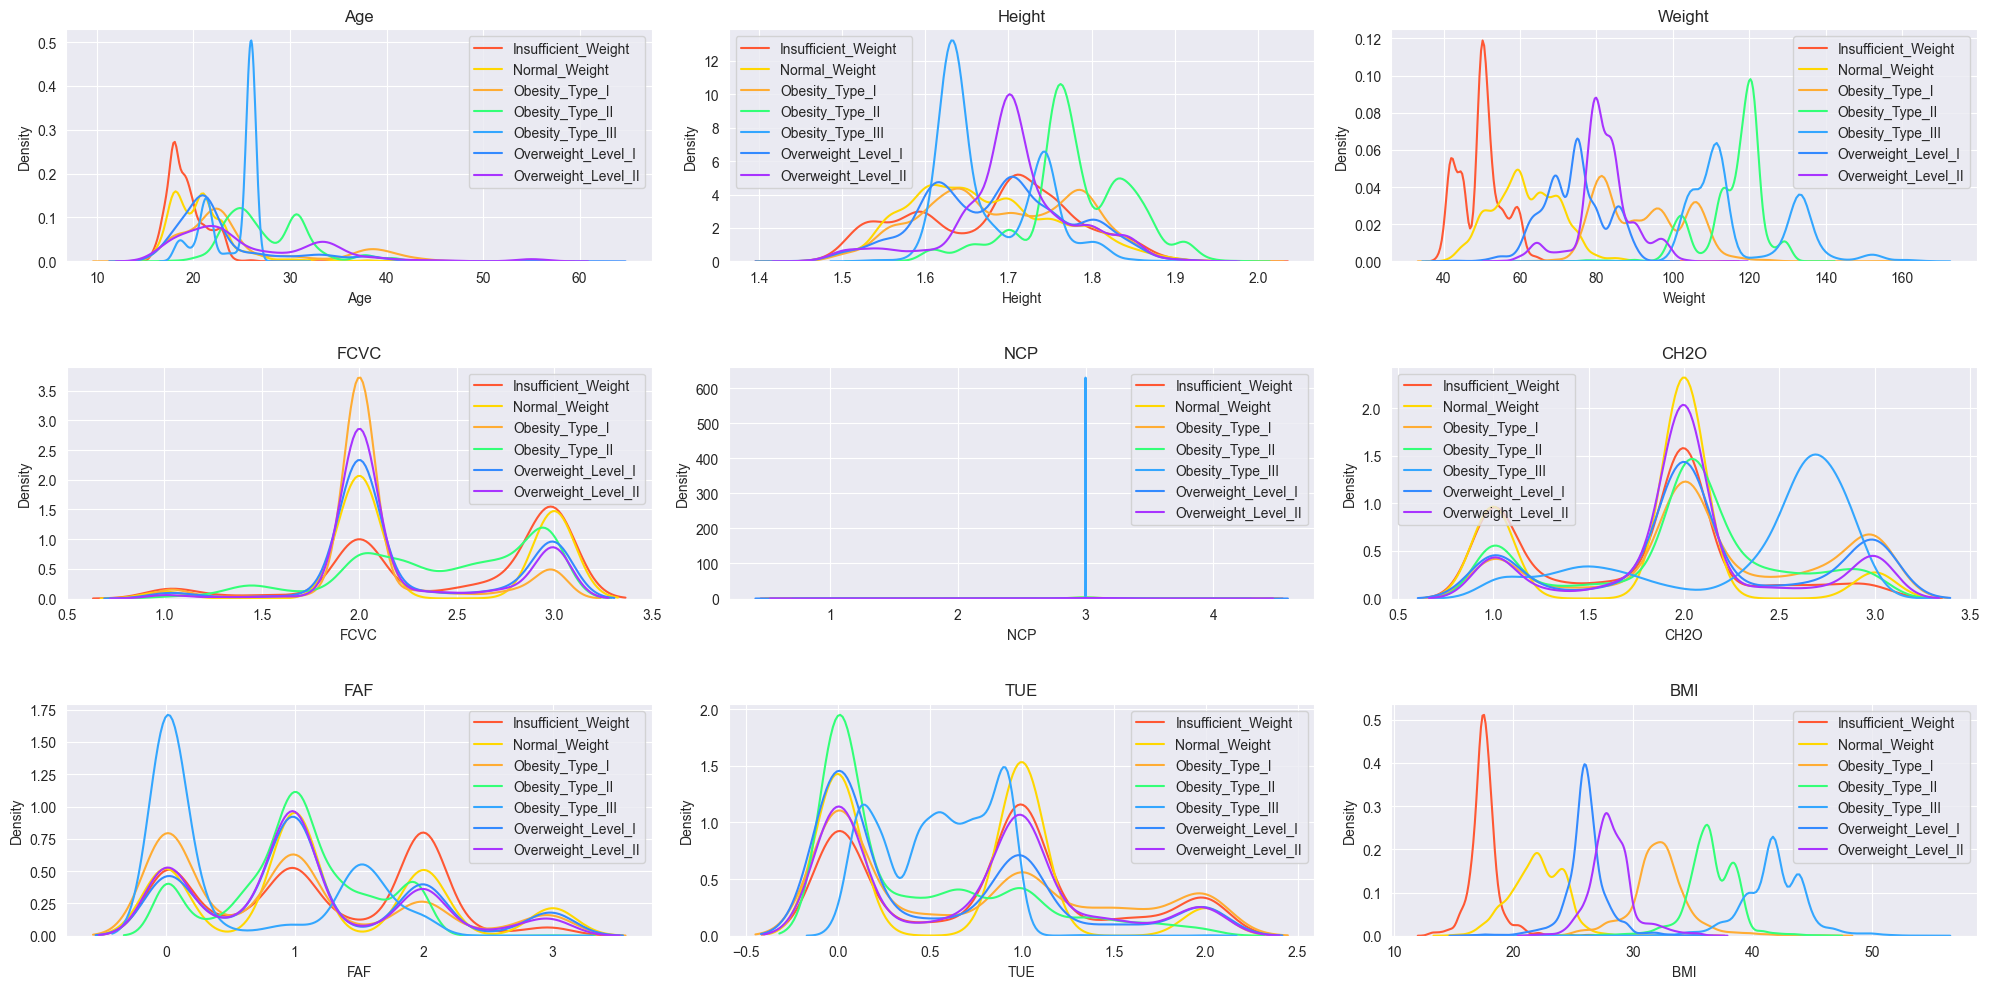

In [110]:
# feature_numerical 取得數值型特徵
feature_numerical = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']

colors = ["#FF5733", "#FFD700", "#FFAC33", "#33FF77", "#33A6FF", "#338AFF", "#A833FF"]

# 觀察數值類型的特徵
plt.figure(figsize=(20,10))
for i, source in enumerate(feature_numerical):
    # 指定好子圖的位置 
    plt.subplot(3, 3, i+1)

    # 增加核密度估計
    sns.kdeplot(df_train.loc[df_train['NObeyesdad']=='Insufficient_Weight', source], color = colors[0], label='Insufficient_Weight')
    sns.kdeplot(df_train.loc[df_train['NObeyesdad']=='Normal_Weight', source], color = colors[1], label='Normal_Weight')
    sns.kdeplot(df_train.loc[df_train['NObeyesdad']=='Obesity_Type_I', source], color = colors[2], label='Obesity_Type_I')
    sns.kdeplot(df_train.loc[df_train['NObeyesdad']=='Obesity_Type_II', source], color = colors[3], label='Obesity_Type_II')
    sns.kdeplot(df_train.loc[df_train['NObeyesdad']=='Obesity_Type_III', source], color = colors[4], label='Obesity_Type_III')
    sns.kdeplot(df_train.loc[df_train['NObeyesdad']=='Overweight_Level_I', source], color = colors[5], label='Overweight_Level_I')
    sns.kdeplot(df_train.loc[df_train['NObeyesdad']=='Overweight_Level_II', source], color = colors[6], label='Overweight_Level_II')
    plt.legend()    
    plt.title(source)
    
    # 增加子圖間的間隙
    plt.tight_layout(h_pad=3)
plt.show()

#### EDA (類別特徵)

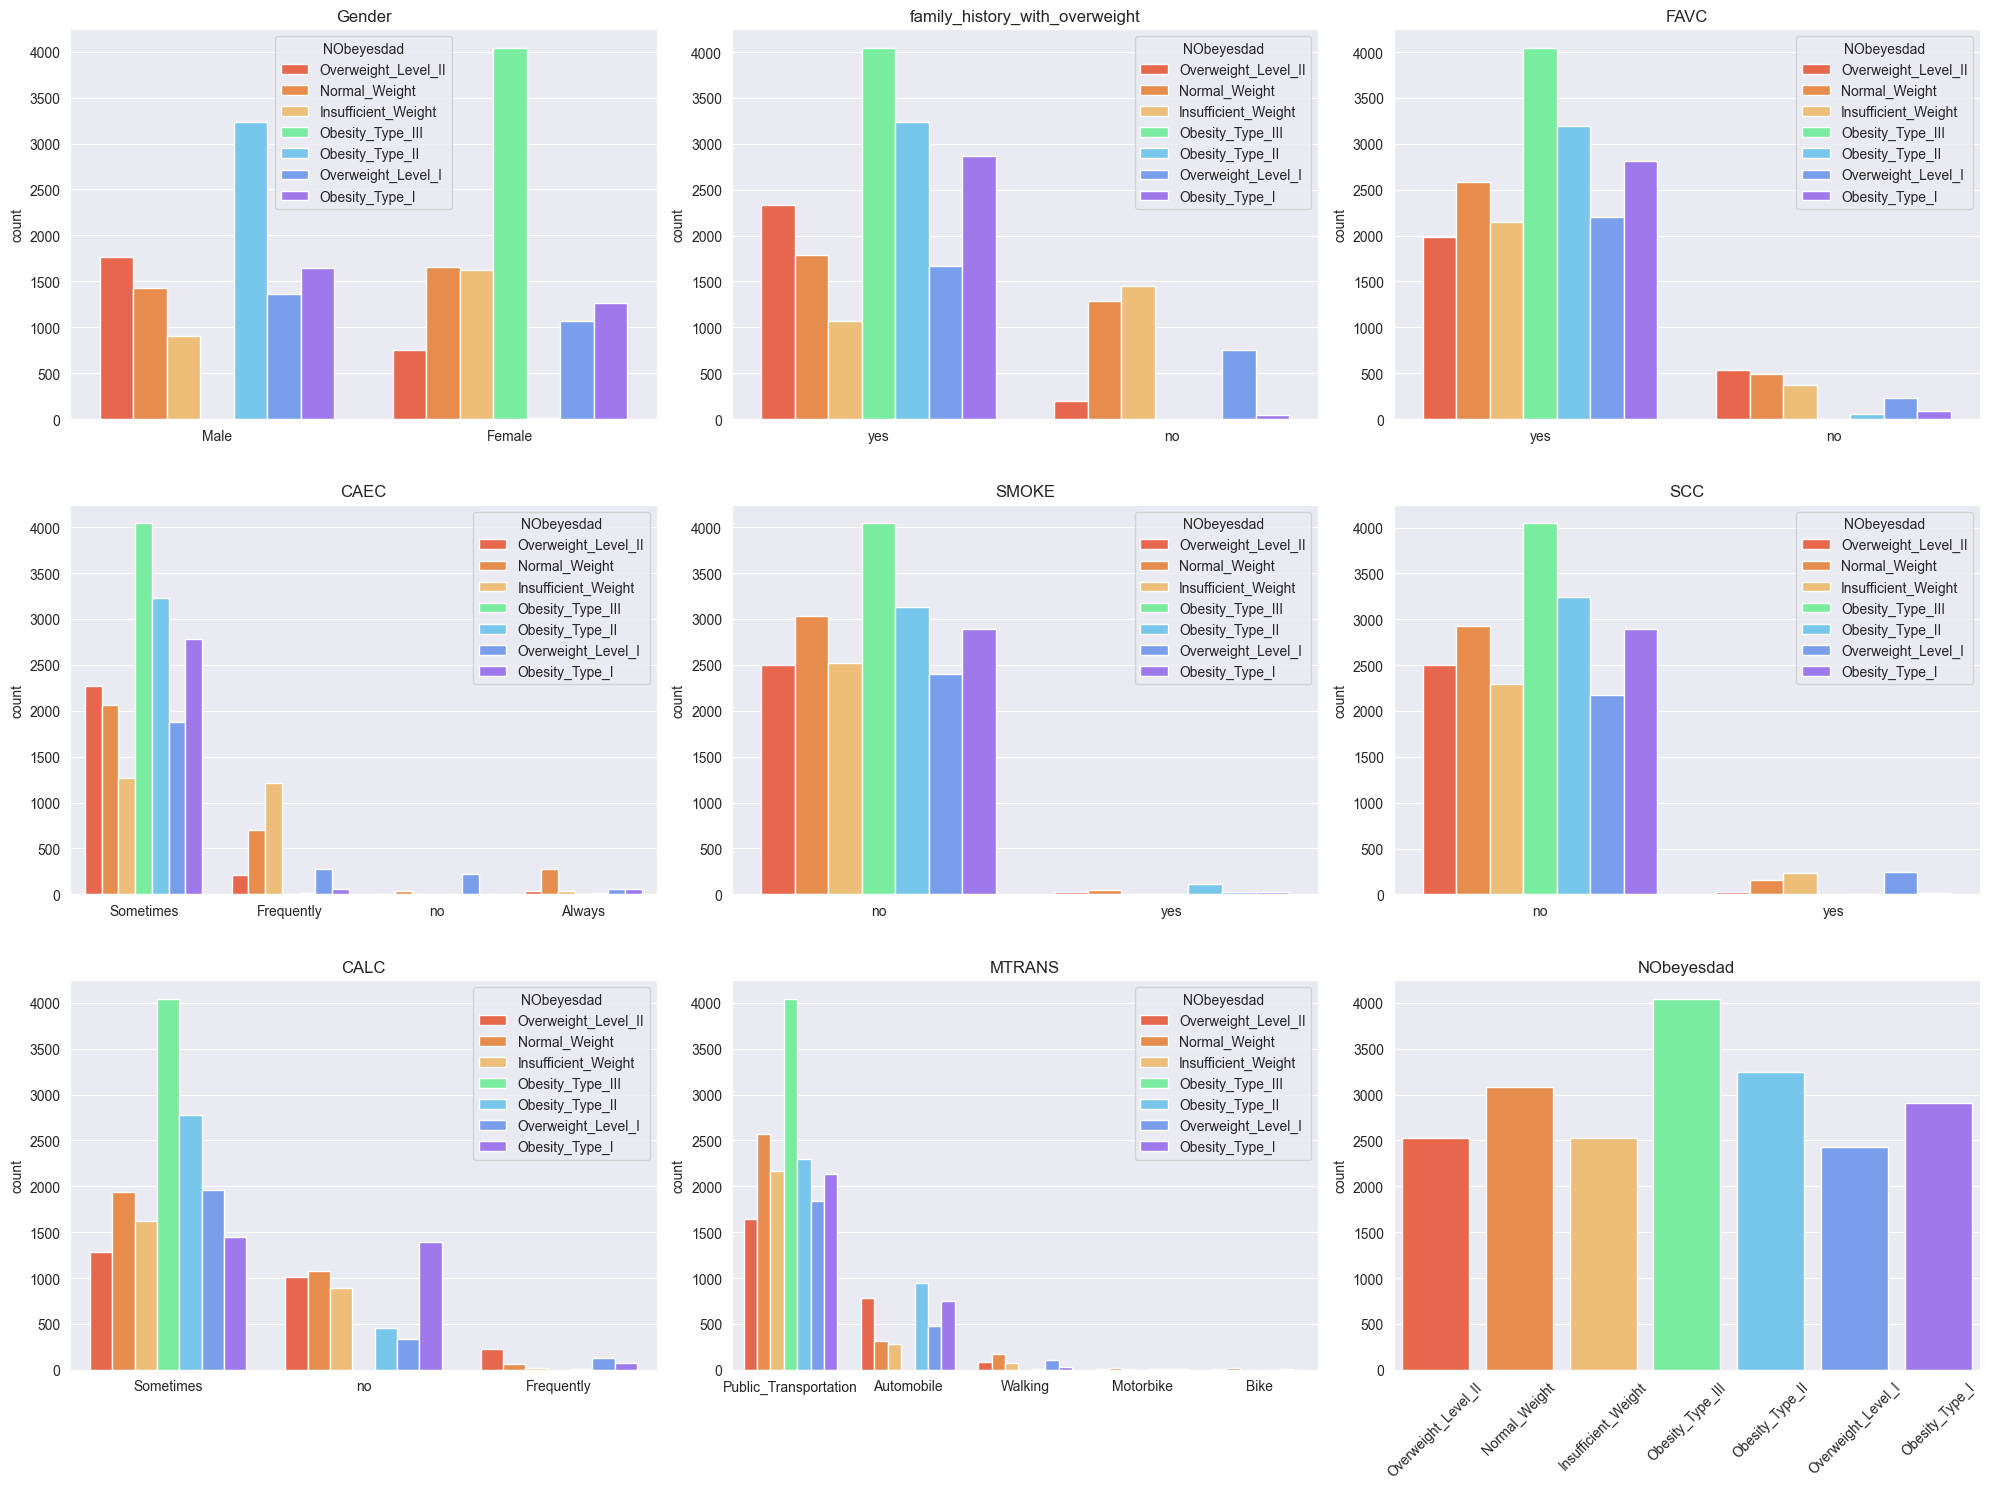

In [111]:
feature_object = [feature for feature in df_train.columns if df_train[feature].dtypes == 'O']

colors = ["#FF5733", "#FF8833", "#FFC266", "#66FF99", "#66CCFF", "#6699FF", "#9966FF"]

# 觀察 Object 類型的特徵
plt.figure(figsize = (20, 15))
for i, source in enumerate(feature_object):
    # 指定好子圖的位置 
    plt.subplot(3, 3, i+1)
    sns.countplot(data = df_train, x = source, hue = 'NObeyesdad', palette = colors).set(xlabel=None)
    plt.title(source)
    if source == 'NObeyesdad':
        plt.xticks(rotation=45)
    # 增加子圖間的間隙
    plt.tight_layout(h_pad=3)
plt.show()